## read xlsx file

In [5]:
import pandas as pd
tr = pd.read_excel('Dataset/tr.xlsx')

In [29]:
tr.GOT

0         NaN
1        17.0
2         NaN
3         NaN
4         NaN
         ... 
52154     NaN
52155    34.0
52156    20.0
52157    22.0
52158     NaN
Name: GOT, Length: 52159, dtype: float64

In [18]:
tr.outcome.value_counts()

0    51280
1      879
Name: outcome, dtype: int64

In [4]:
num = tr.groupby('outcome').get_group(1)['CBC_WBC'].value_counts().sum()
print(num)
print(tr.groupby('outcome').get_group(1).shape[0]-num)
#there are 793:86, missing data, 86 unmissing values==0.11
num = tr.groupby('outcome').get_group(0)['CBC_WBC'].value_counts().sum()
print(num)
print(tr.groupby('outcome').get_group(0).shape[0]-num)
#missing:unmissing = 34958:16322==0.46

86
793
16322
34958


## step1:remove duplicate data

In [5]:
index_du = tr[tr.duplicated()].index
print(index_du[index_du>878])#3010
print(index_du[index_du<878])#8

Int64Index([  969,  1365,  1505,  1526,  1583,  1622,  2029,  2073,  2101,
             2283,
            ...
            52035, 52057, 52059, 52063, 52083, 52098, 52110, 52116, 52141,
            52152],
           dtype='int64', length=3010)
Int64Index([640, 652, 725, 748, 757, 766, 773, 828], dtype='int64')


In [6]:
# tr.duplicated().any()#find that there are some dupicated records
# tr.drop(tr[tr.duplicated()].index, inplace=True)
# tr.reset_index(drop=True, inplace=True)
# tr.shape

In [7]:
tr

,outcome,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
0,1,59.0,F,8.0,TKA,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,69.0,M,5.0,TKA,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,80.0,M,8.0,TKA,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,66.0,M,14.0,TKA,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,52.0,F,4.0,TKA,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52154,0,78.0,F,3.0,THA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52155,0,78.0,M,4.0,TKA,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52156,0,73.0,F,5.0,THA,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52157,0,74.0,F,5.0,THA,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## step2:draw the plot of every attribute
goal:check oulier and the dist of attrs.</br>
NOTE: don't do any transformation on "outcome" column!</br>
because that is y.

In [8]:
tr.dtypes.value_counts()

int64      43
float64    23
object      2
dtype: int64

#### 1. check int64 categorical attr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

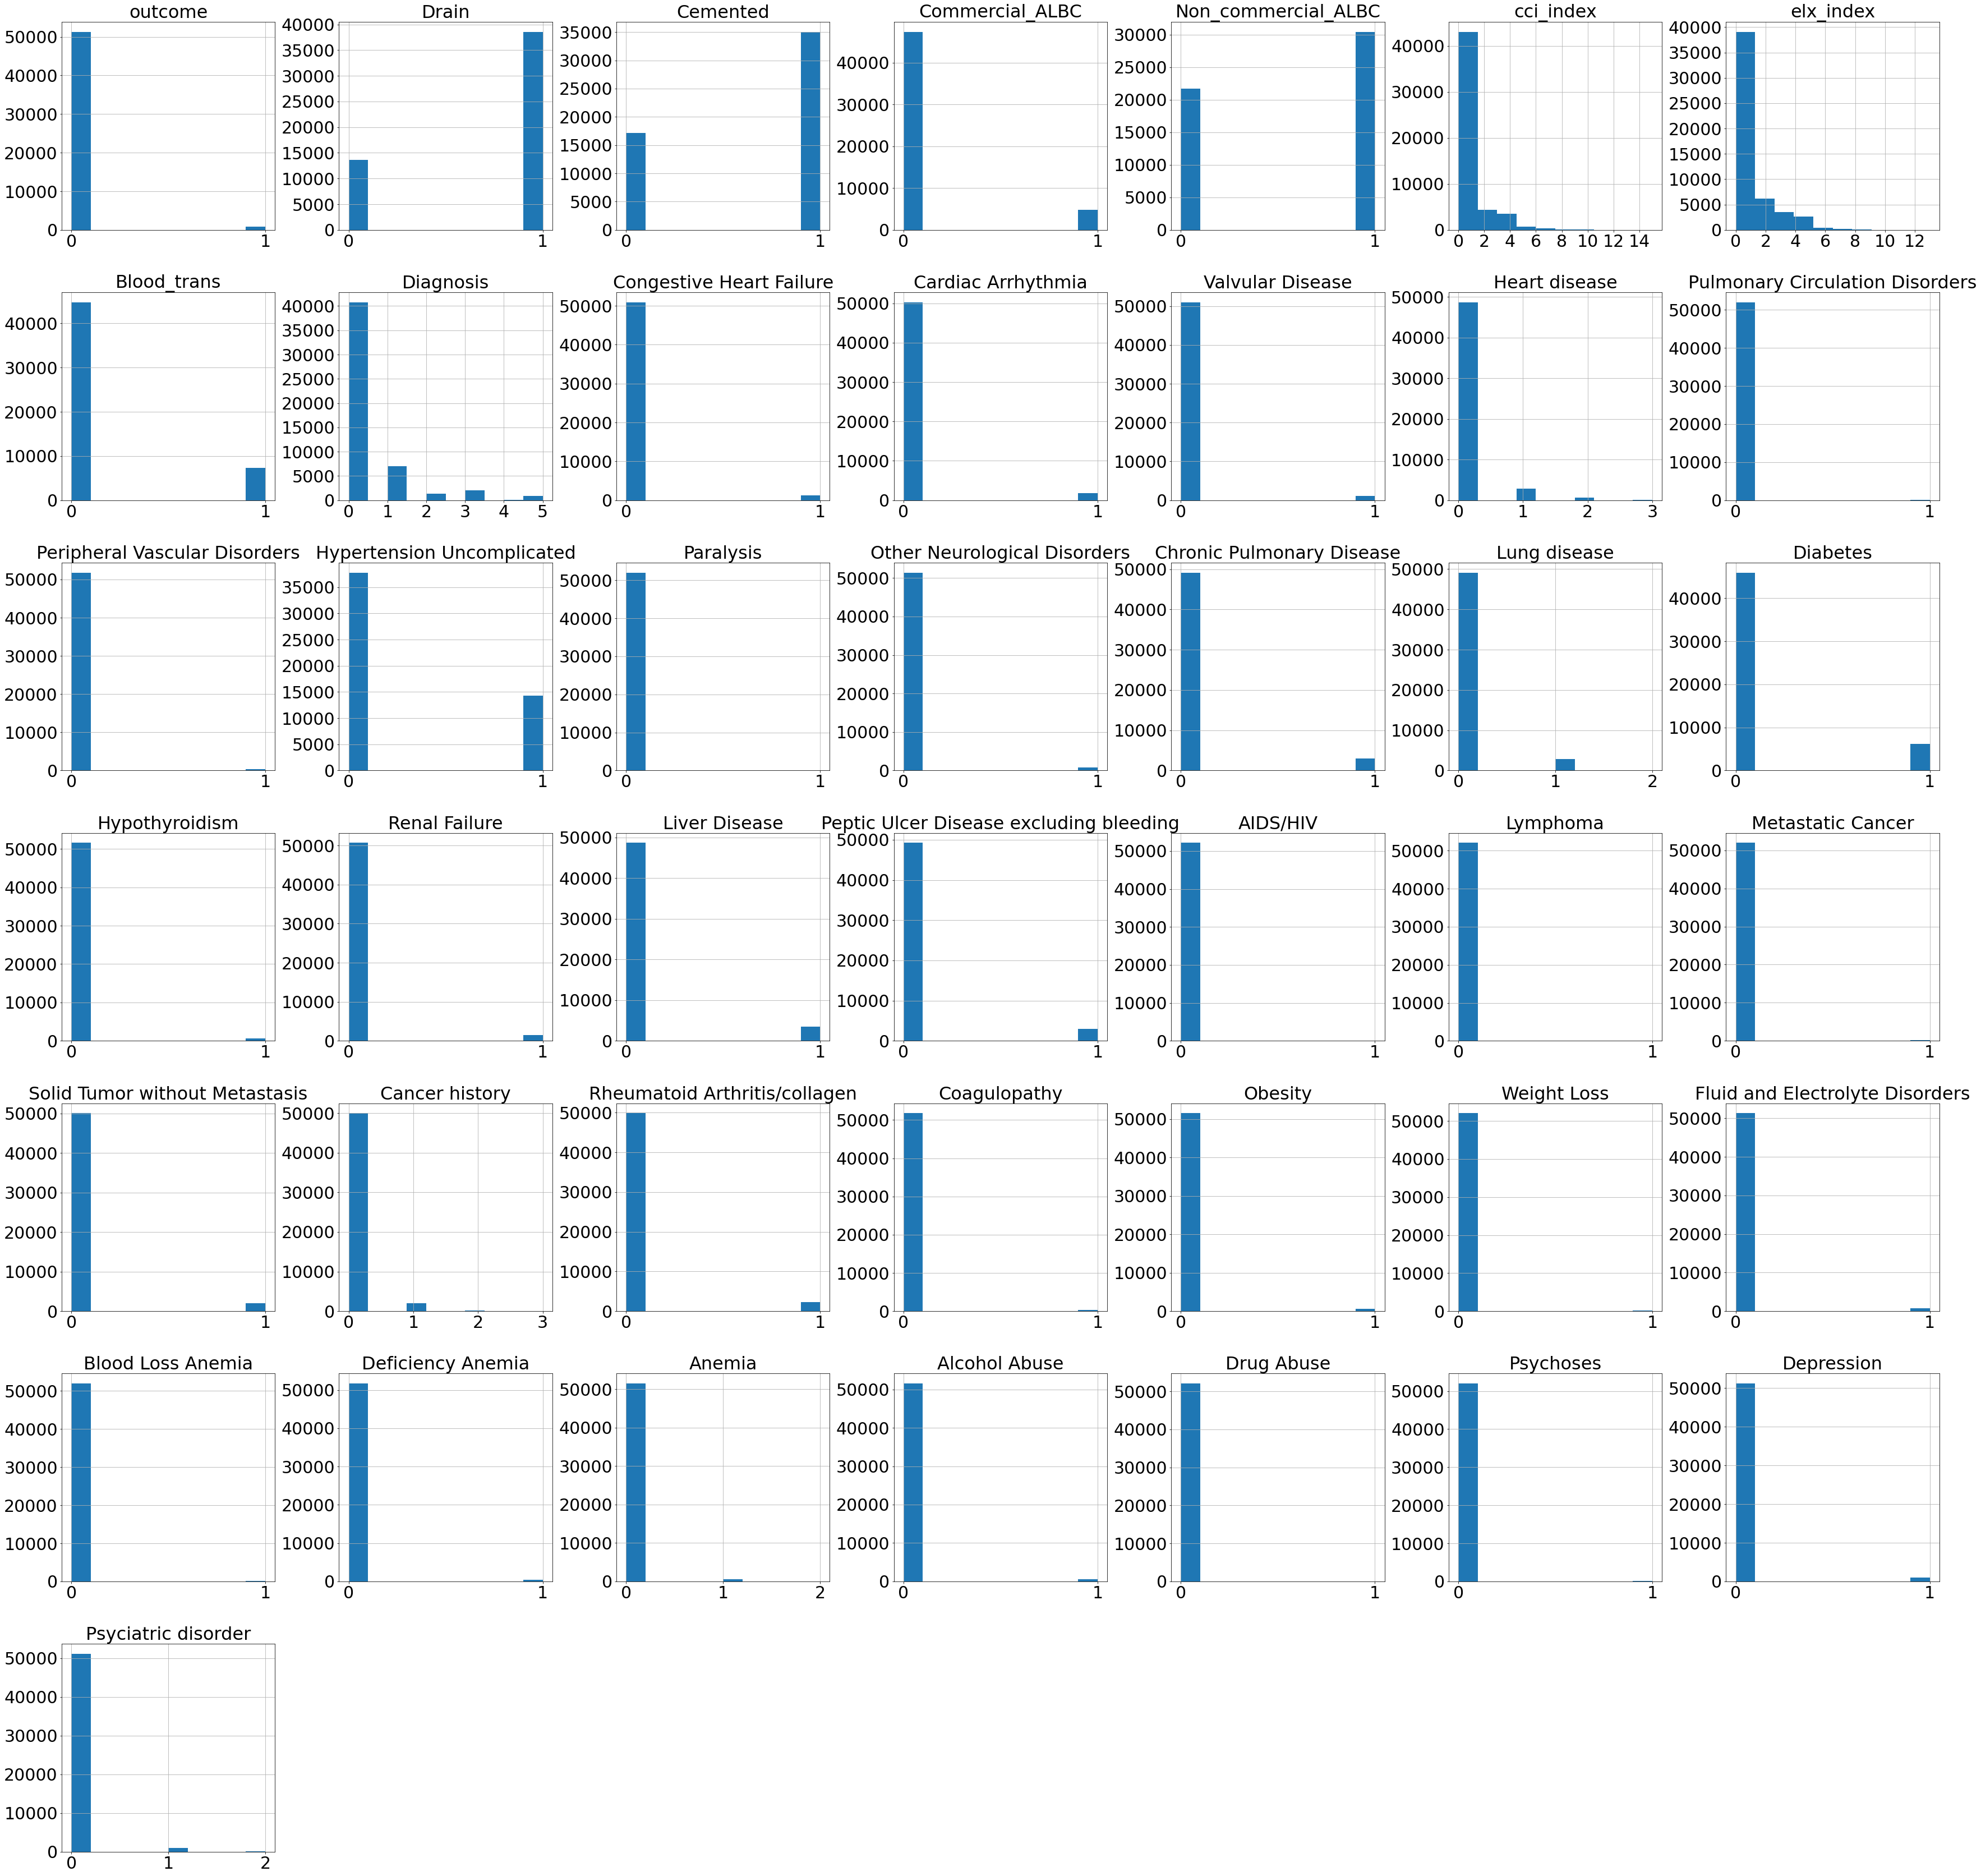

In [9]:
fig = tr.select_dtypes(include=['int64']).hist(figsize=(60, 60),
                                               xlabelsize=30, 
                                               ylabelsize=30)

[x.title.set_size(32) for x in fig.ravel()]

[x.xaxis.get_major_locator().set_params(integer=True) for x in fig.ravel()]

#### 2. object nomial attr.

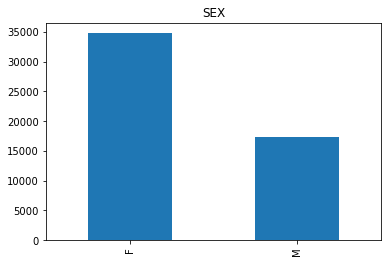

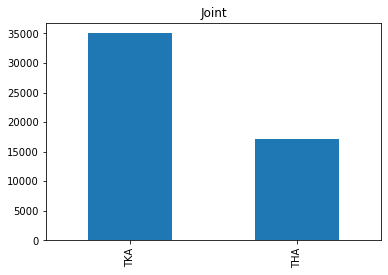

In [10]:
import matplotlib.pyplot as plt
for i, col in enumerate(tr.select_dtypes(include=['object']).columns):
    plt.figure(i)
    tr[col].value_counts().plot(kind='bar')
    plt.title(col)

#### 3. float numeric attr.
(1)draw boxplot</br>
(2)according to the trivial outlier, observe them</br>
(3)remove some obvious outliers</br>

In [11]:
# https://dataprocessing.aixcape.org/DataPreprocessing/DataCleaning/OutlierDetection/OutlierDetectionWithChiSquaredTest/index.html

# https://www.quora.com/During-data-analysis-using-R-what-should-we-care-about-first-the-outliers-or-the-missing-values
# about outlier first
# 獲益良多德斯

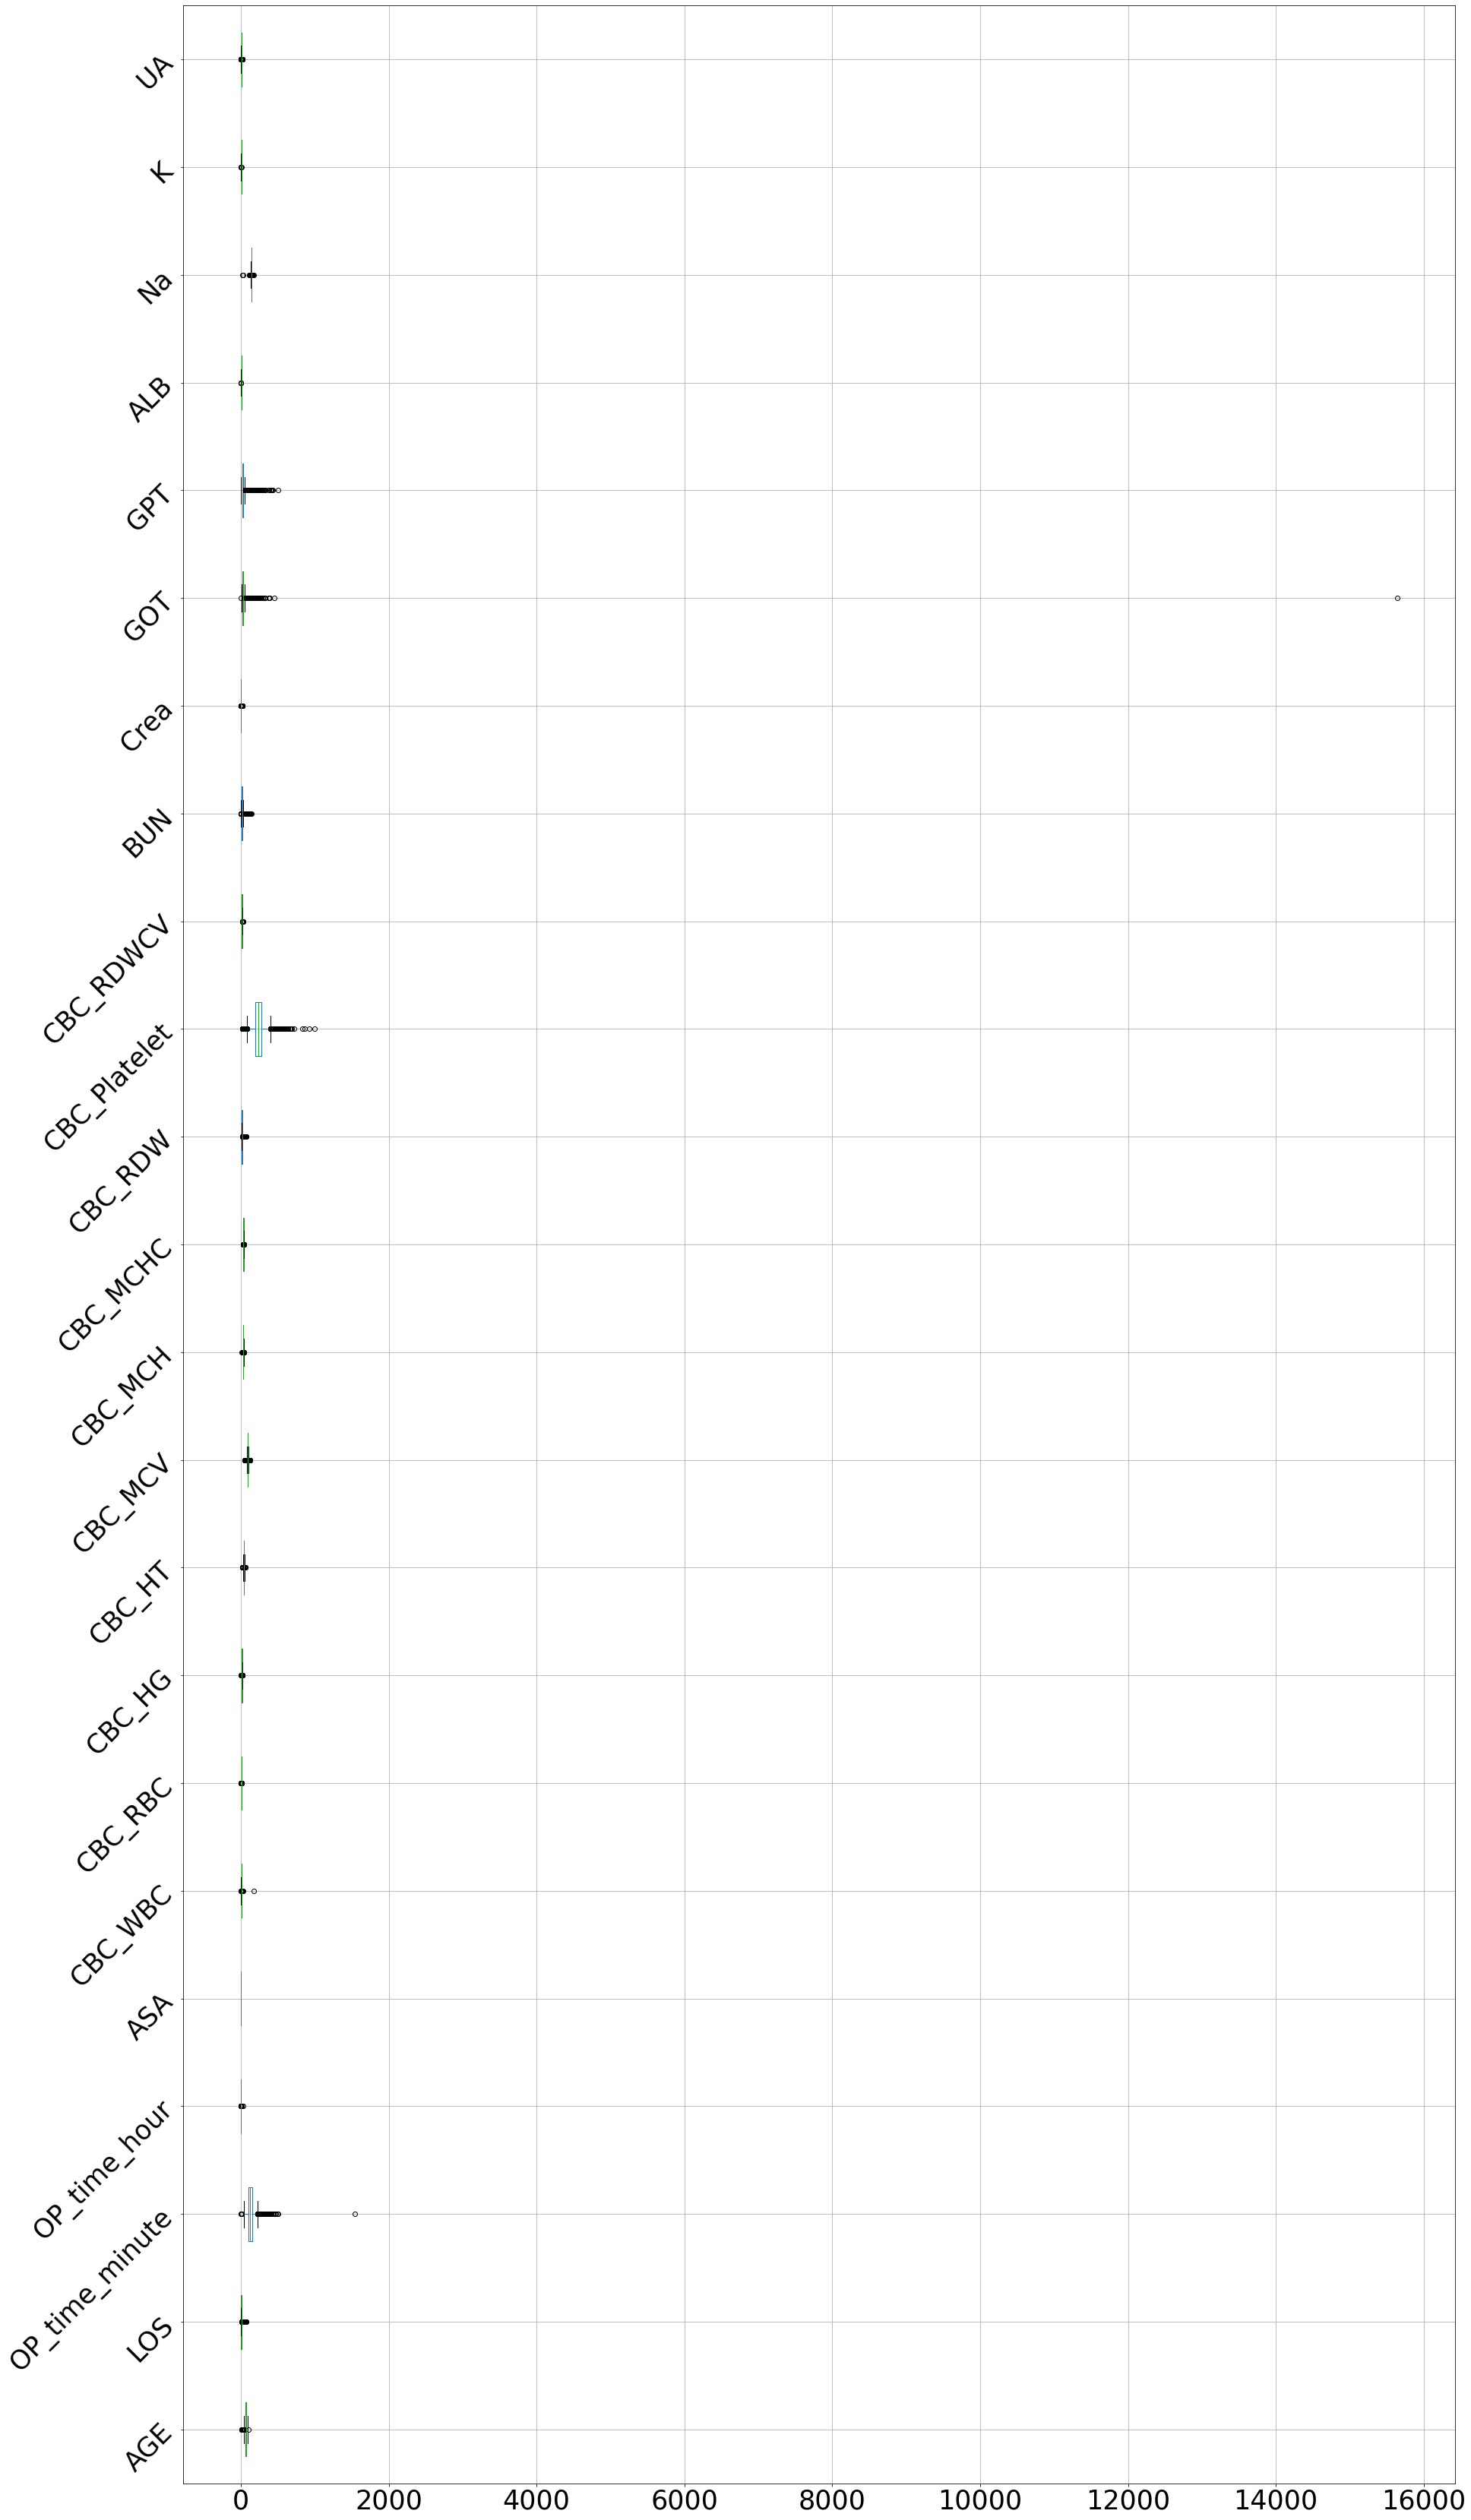

In [12]:
tr_float = tr.select_dtypes(include=['float'])
fig = tr_float.boxplot(figsize=(30, 60),
                       fontsize=35,
                       rot=45,
                       vert=False)

#we can trivially speak, there is an outlier in GOT attr


<AxesSubplot:>

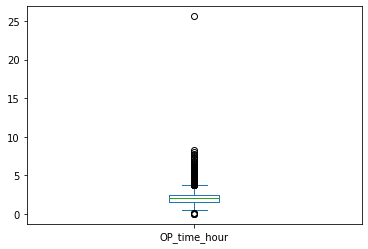

In [27]:
tr['OP_time_hour'].plot.box()

False
float====================
AGE                 84.0
LOS                  4.0
OP_time_minute    1539.0
OP_time_hour       25.65
ASA                  3.0
CBC_WBC              NaN
CBC_RBC              NaN
CBC_HG               NaN
CBC_HT               NaN
CBC_MCV              NaN
CBC_MCH              NaN
CBC_MCHC             NaN
CBC_RDW              NaN
CBC_Platelet         NaN
CBC_RDWCV            NaN
BUN                  NaN
Crea                 NaN
GOT                  NaN
GPT                  NaN
ALB                  NaN
Na                   NaN
K                    NaN
UA                   NaN
Name: 36542, dtype: object
int====================
outcome                                     0
Drain                                       1
Cemented                                    1
Commercial_ALBC                             0
Non_commercial_ALBC                         1
cci_index                                  10
elx_index                                   6
Blood_trans         

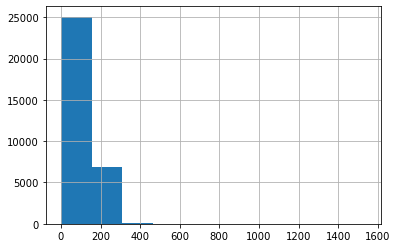

In [13]:
# first we found three special points
'''
1.OP_time_minutes
2.GOT
3.CBC_WBC
'''
#OP_time_miuntes:means operation time
'''
that is, the oeration time of this patient had lasted for 1539 minutes
=1539/60 hours=25.65 hour
it is possible, maybe this patient got really heavy sick
if we compare to outcome, this patient is non infected
but why he had so long operation time?
this data has many missing values
and some attributes shows that he is a special patient
a old man got sick, he has bad lung function, and any other disease in the meantime(int64 attr)
the only special thing is he has cancer history attr with value2
but I still delete it, because if I understood this record from different aspects in the data
a. he is not special.
b. he did not do blood test, too many missing values in blood test part
I guess the reason why he had so high minutes is from the missing value or other attr didnot recorded.
or even, wrong record.

after observed this data, I decided to delete it.
'''
attr = 'OP_time_minute'
idx = tr[attr].idxmax()
print(idx<878)
tr.iloc[idx, :][attr]
tr.iloc[idx, :]['OP_time_hour']
print('float'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['float']).columns])
print('int'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['int']).columns])
print('object'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['object']).columns])

#draw pic
fig = tr[attr].hist()

#delete it
tr.drop(tr[attr].idxmax(), inplace=True)
tr.reset_index(drop=True, inplace=True)

False
float====================
AGE                   73.0
LOS                    4.0
OP_time_minute        82.0
OP_time_hour      1.366667
ASA                    3.0
CBC_WBC              10.27
CBC_RBC               5.47
CBC_HG               14.59
CBC_HT                41.0
CBC_MCV              94.01
CBC_MCH              32.42
CBC_MCHC             34.93
CBC_RDW              14.24
CBC_Platelet         232.0
CBC_RDWCV              NaN
BUN                  20.17
Crea                  2.23
GOT                15643.0
GPT                  217.0
ALB                    NaN
Na                  144.32
K                     5.53
UA                    7.84
Name: 38391, dtype: object
int====================
outcome                                    0
Drain                                      1
Cemented                                   1
Commercial_ALBC                            0
Non_commercial_ALBC                        1
cci_index                                  4
elx_index                 

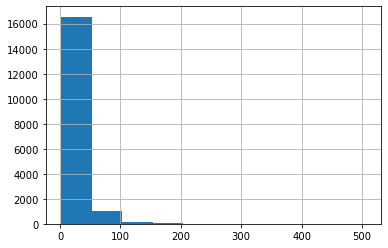

In [14]:
#GOT:routine blood test:a index check if you liver is healthy
'''
after google some information
in this patient, his GOT is larger than 15000
but in clinical test, GOT is really hard to exceed 500
although he had liver disease, and he got a higher GPT
but I still decided to delete it
because 15000 is almost 30 times than the upper bound of reference range.
the prob of this thing happend is extremely low
so I think this value maybe is from system error instead of some special reason.
'''
attr = 'GOT'
idx = tr[attr].idxmax()
print(idx<878)
tr.iloc[idx, :][attr]
tr.iloc[idx, :][attr]
print('float'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['float']).columns])
print('int'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['int']).columns])
print('object'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['object']).columns])

#draw pic
fig = tr['GPT'].hist()

# delete it
tr.drop(tr[attr].idxmax(), inplace=True)
tr.reset_index(drop=True, inplace=True)

In [15]:
tr[attr].describe()

count    22876.000000
mean        29.450560
std         18.552364
min          4.000000
25%         21.000000
50%         25.000000
75%         31.000000
max        456.000000
Name: GOT, dtype: float64

<AxesSubplot:>

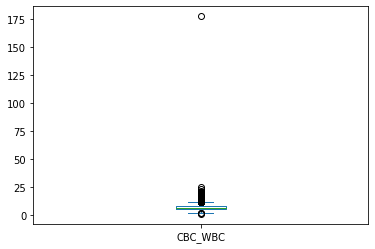

In [31]:
tr.CBC_WBC.plot.box()

count    16407.000000
mean         8.233479
std          2.405602
min          2.170000
25%          6.870000
50%          7.970000
75%          9.270000
max        178.770000
Name: CBC_WBC, dtype: float64
False
float====================
AGE                 78.0
LOS                  2.0
OP_time_minute      66.0
OP_time_hour         1.1
ASA                  3.0
CBC_WBC           178.77
CBC_RBC             4.96
CBC_HG             12.89
CBC_HT              39.9
CBC_MCV           103.61
CBC_MCH            32.22
CBC_MCHC           31.43
CBC_RDW            14.64
CBC_Platelet       208.0
CBC_RDWCV            NaN
BUN                19.87
Crea                2.01
GOT                  NaN
GPT                  NaN
ALB                  NaN
Na                146.32
K                    NaN
UA                   NaN
Name: 43921, dtype: object
int====================
outcome                                    0
Drain                                      0
Cemented                                   0
C

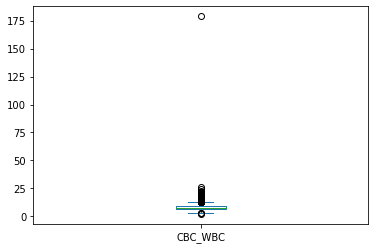

In [16]:
#CBC_WBC:blood test, number of WBC
'''
reference range:4~10*10^3/ul
most people has normal WBC except for
178.77 is already 17 times than the upper bound of the range 
MCV偏高
but >100 maybe慢性白血病
so, I guess this patient just got 慢性白血病
thus he has such high CBC_WBC
so I decided not to delete it.
'''
print(tr['CBC_WBC'].describe())
tr['CBC_WBC'].plot.box()

attr = 'CBC_WBC'
idx = tr[attr].idxmax()
print(idx<878)
tr.iloc[idx, :][attr]
tr.iloc[idx, :][attr]
print('float'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['float']).columns])
print('int'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['int']).columns])
print('object'+"="*20)
print(tr.iloc[idx, :][tr.select_dtypes(include=['object']).columns])

In [19]:
tr.shape

(52157, 68)

In [17]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/1_data_cleaning.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tr.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [18]:
tr.shape

(52157, 68)

In [2]:
tr.transpose()

NameError: name 'tr' is not defined